In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the dataset

data = pd.read_csv("C:/Users/ronit/OneDrive/Ronit/Machine Learning/Projects/Random Forest/My Project/Data/Dataset_spine.csv")
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal,NaN
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal,NaN
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal,NaN
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal,NaN


In [3]:
data.isnull().sum()

Col1             0
Col2             0
Col3             0
Col4             0
Col5             0
Col6             0
Col7             0
Col8             0
Col9             0
Col10            0
Col11            0
Col12            0
Class_att        0
Unnamed: 13    296
dtype: int64

# Data Preprocessing

In [4]:
# Dropping the unwanted column

data.drop("Unnamed: 13",axis=1, inplace = True)
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [5]:
data.columns = ["Pelvic Incidence", "Pelvic Tilt", "Lumbar Lordosis Angle", "Sacral Slope", "Pelvic Radius", 
                "Degree Spondylolisthesis", "Pelvic Slope", "Direct Tilt", "Thoracic Slope", "Cervical Tilt", "Sacrum Angle",
                "Scoliosis Slope", "Class Attribute"]
data

,Pelvic Incidence,Pelvic Tilt,Lumbar Lordosis Angle,Sacral Slope,Pelvic Radius,Degree Spondylolisthesis,Pelvic Slope,Direct Tilt,Thoracic Slope,Cervical Tilt,Sacrum Angle,Scoliosis Slope,Class Attribute
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [6]:
# Mapping Nominal data to numeric values to perform Random Forest effectively

temp = {"Abnormal": 0, "Normal": 1}

In [7]:
# Defining the features and the target variable

X = data.drop("Class Attribute",axis=1)
y = data["Class Attribute"]

In [8]:
# Train test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))

Accuracy:  0.7258064516129032


# Hyperparameters Tuning

In [10]:
# Instantiating the grid search model

parameters_grid = {"max_depth": [50, 70, 90, 110], "max_features": [10, 11, 12], "min_samples_leaf": [3, 4, 5],"min_samples_split": [8, 10, 12], "n_estimators": [50, 100, 150, 200]}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = parameters_grid, cv=3)

Fitting the model, checking the best hyperparameters combination and predicting using the hypertuned parameters for prediction

In [11]:
# Fitting the grid search to the data
grid_search.fit(X_train,y_train)

# Saving the best parameter combination to best_grid
best_grid = grid_search.best_estimator_

# Predicting using best_grid
Test_Prediction_Y = best_grid.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, Test_Prediction_Y))

Accuracy:  0.8064516129032258


# The Accuracy of the model increased from 72.58% to 80.64%!

Printing the best Parameters

In [12]:
# Showing the best selected parameters and Estimator 

print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 70, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=70, max_features=10, min_samples_leaf=4,
                       min_samples_split=10)


In [13]:
# Comparison of the Cross-Validation Score on the different estimators (n_estimators) in the Random Forest

results = pd.DataFrame(grid_search.cv_results_["params"])
results["test_score"] = grid_search.cv_results_["mean_test_score"]
results

,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score
0,50,10,3,8,50,0.830542
1,50,10,3,8,100,0.846753
2,50,10,3,8,150,0.842688
3,50,10,3,8,200,0.846704
4,50,10,3,10,50,0.834656
...,...,...,...,...,...,...
427,110,12,5,10,200,0.830591
428,110,12,5,12,50,0.834607
429,110,12,5,12,100,0.850769
430,110,12,5,12,150,0.850769


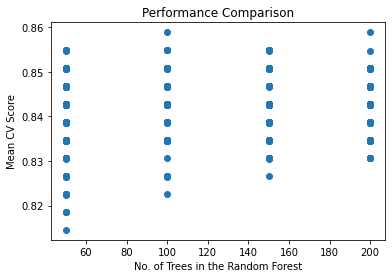

In [14]:
# Checking the test scores against the number of trees in the Forest

plt.scatter(results["n_estimators"], results["test_score"]) 
plt.xlabel("No. of Trees in the Random Forest")
plt.ylabel("Mean CV Score")
plt.title("Performance Comparison")
plt.show()

Checking the Accuracy, Precision, Classification Report and the Confusion Matrix

Accuracy:  0.8064516129032258


Precision:  0.8333333333333334


              precision    recall  f1-score   support

    Abnormal       0.79      0.88      0.83        34
      Normal       0.83      0.71      0.77        28

    accuracy                           0.81        62
   macro avg       0.81      0.80      0.80        62
weighted avg       0.81      0.81      0.80        62





Text(0.5, 1.0, 'Confusion Matrix')

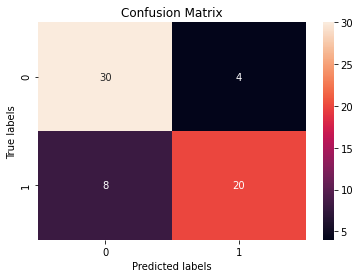

In [22]:
print("Accuracy: ", accuracy_score(y_test,Test_Prediction_Y))
print("\n")
print("Precision: ", precision_score(y_test1,Test_Prediction_Y1))
print("\n")
print(classification_report(y_test, Test_Prediction_Y))
print("\n")
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, Test_Prediction_Y), annot=True, ax = ax)
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

# Plotting a ROC Curve and calclating the AUC

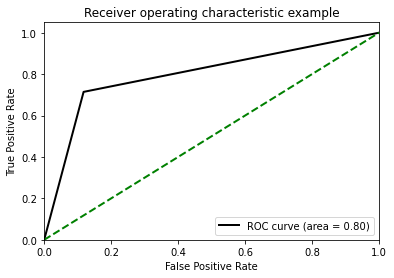

In [16]:
# Mapping the test set and the prediction set to Integers to plot the ROC Curve effectively
Test_Prediction_Y1 = pd.Series(Test_Prediction_Y)
Test_Prediction_Y1=Test_Prediction_Y1.map(temp)

y_test1 = pd.Series(y_test)
y_test1=y_test1.map(temp)

# Computing the ROC curve and ROC area for predictions on validation set
fpr, tpr, _ = roc_curve(y_test1, Test_Prediction_Y1)
roc_auc = auc(fpr, tpr)

# Plotting the Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='black',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The Area under curve is 0.80 indicating that the model is good.

# The End!
https://github.com/ronitch